In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:

file_path = 'Crude_Oil_Data.csv'
df = pd.read_csv(file_path)

df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2000-08-23 00:00:00+00:00,32.049999,32.049999,32.799999,31.950001,31.950001,79385
1,2000-08-24 00:00:00+00:00,31.629999,31.629999,32.240002,31.400000,31.900000,72978
2,2000-08-25 00:00:00+00:00,32.049999,32.049999,32.099998,31.320000,31.700001,44601
3,2000-08-28 00:00:00+00:00,32.869999,32.869999,32.919998,31.860001,32.040001,46770
4,2000-08-29 00:00:00+00:00,32.720001,32.720001,33.029999,32.560001,32.820000,49131


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Average_Price'] = (df['High'] + df['Low']) / 2

In [11]:
df.corr()

,Adj_Close,Close,High,Low,Open,Volume,Average_Price
Adj_Close,1.000000,1.000000,0.998743,0.999222,0.997863,0.089042,0.999424
Close,1.000000,1.000000,0.998743,0.999222,0.997863,0.089042,0.999424
High,0.998743,0.998743,1.000000,0.998223,0.999152,0.096165,0.999566
Low,0.999222,0.999222,0.998223,1.000000,0.998631,0.083729,0.999546
Open,0.997863,0.997863,0.999152,0.998631,1.000000,0.090287,0.999339
Volume,0.089042,0.089042,0.096165,0.083729,0.090287,1.000000,0.090057
Average_Price,0.999424,0.999424,0.999566,0.999546,0.999339,0.090057,1.000000


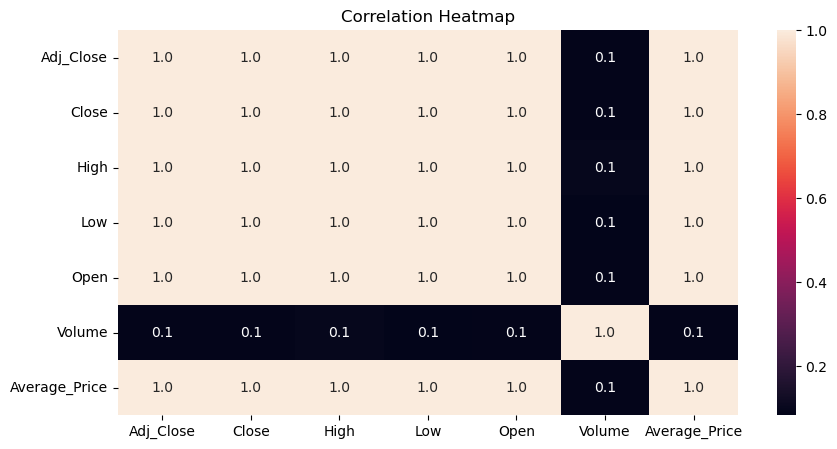

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
X = ['Open', 'High', 'Low', 'Volume', 'Average_Price']
X = X[features]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.9993466493628594